In [2]:
import tensorflow as tf

C:\Users\suljeewoo\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\suljeewoo\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\suljeewoo\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\suljeewoo\anaconda3\envs\tensorflow\l

# constant

In [3]:
constant_value = tf.constant("Deep Learning course")
print(constant_value)

Tensor("Const:0", shape=(), dtype=string)


In [4]:
ten = tf.constant(10)
nine = tf.constant(9)
nineteen = tf.add(ten, nine)
print(nineteen)

Tensor("Add:0", shape=(), dtype=int32)


In [5]:
constant_arr = tf.constant([1,2])
print(constant_arr)

Tensor("Const_3:0", shape=(2,), dtype=int32)


In [6]:
sess = tf.Session() # 세션을 열어준다!
print(sess.run(constant_value))
print(sess.run([ten, nine, nineteen]))
print(sess.run(constant_arr))
sess.close()

b'Deep Learning course'
[10, 9, 19]
[1 2]


# placeholder, Variable

In [7]:
X = tf.placeholder(tf.float32, [None, 3])
print(X)

Tensor("Placeholder:0", shape=(?, 3), dtype=float32)


In [8]:
x_data = [[1,2,3], [4,5,6]]
W = tf.Variable(tf.random_normal([3,2]))
b = tf.Variable(tf.random_normal([2,1]))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
expr = tf.matmul(X,W) + b

sess = tf.Session()
sess.run(tf.global_variables_initializer())  # Session을 시작하고 이를 통해 전체 var 초기값들을 정해준다!

In [10]:
print(x_data)
print(sess.run(W))
print(sess.run(b))

[[1, 2, 3], [4, 5, 6]]
[[-0.05583444 -0.36311644]
 [-0.31536892 -0.0694835 ]
 [-0.14738321  1.0556284 ]]
[[-1.8905709]
 [ 1.193165 ]]


In [11]:
# WX + b
print(sess.run(expr, feed_dict={X:x_data}))

[[-3.0192928  0.7742312]
 [-1.4913167  5.727052 ]]


In [12]:
sess.close()

# MNIST

손글씨를 이미지화시켜서 저장해논 데이터셋

<br>

* 이미지 : 784차원의 벡터    ex) [0,0,0,0 .., 7,1,0,0,0 ...]
* 라벨 : 0 ~ 9

In [13]:
from tensorflow.examples.tutorials.mnist import input_data

In [14]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [15]:
# x : n 만큼의 random한 mnist 이미지 데이터
# y : n 만큼의 random한 mnist 이미지 데이터의 label
x,y = mnist.train.next_batch(1)

In [16]:
import numpy as np

# (n,284) 차원의 벡터 -> (n,28,28) 차원의 벡터로 reshape
mnist_image = np.array(x).reshape((28,28))

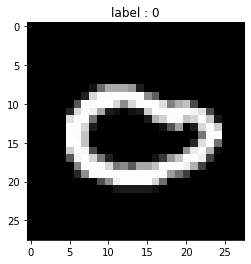

In [17]:
import matplotlib.pyplot as plt

plt.title("label : "+str(np.where(y[0] == 1)[0][0]))
plt.imshow(mnist_image, cmap="gray")
plt.show()